In [17]:
import signal_ana as ana
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Load the signals
df = ana.load_signals('features_30.h5')

In [19]:
# Scale to 0 mean and unit variance
ana.normalize(df, 'waveform')
ana.normalize(df, 'lpc_coeff')
ana.normalize(df, 'amplitude')

In [20]:
# Exclude the eruption days
eruption_days = ['2019-08-28', '2019-08-29', '2019-07-03']
df = ana.exclude_days(df, eruption_days)

In [21]:
# Select a test period
df_test = ana.test_period(df)

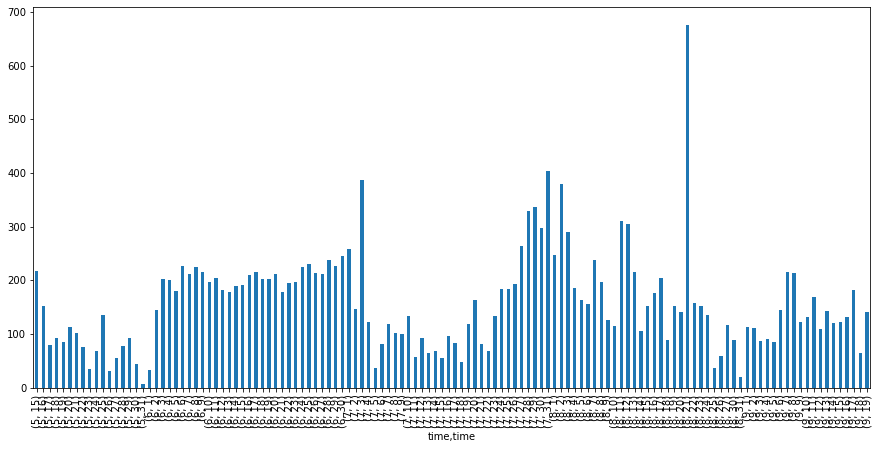

In [22]:
# Frequency of signals per day
ana.plot_freq(df)

In [23]:
features = ana.get_features(df, lpc=False, amp=False)

In [24]:
# Train som
size = 16
niter = 10000
sigma=0.3
learning_rate=.5
pca=True
random_seed = 1

som = ana.get_som(features, size, niter = niter, sigma=sigma, learning_rate=learning_rate, 
                  pca=pca, random_seed = random_seed)

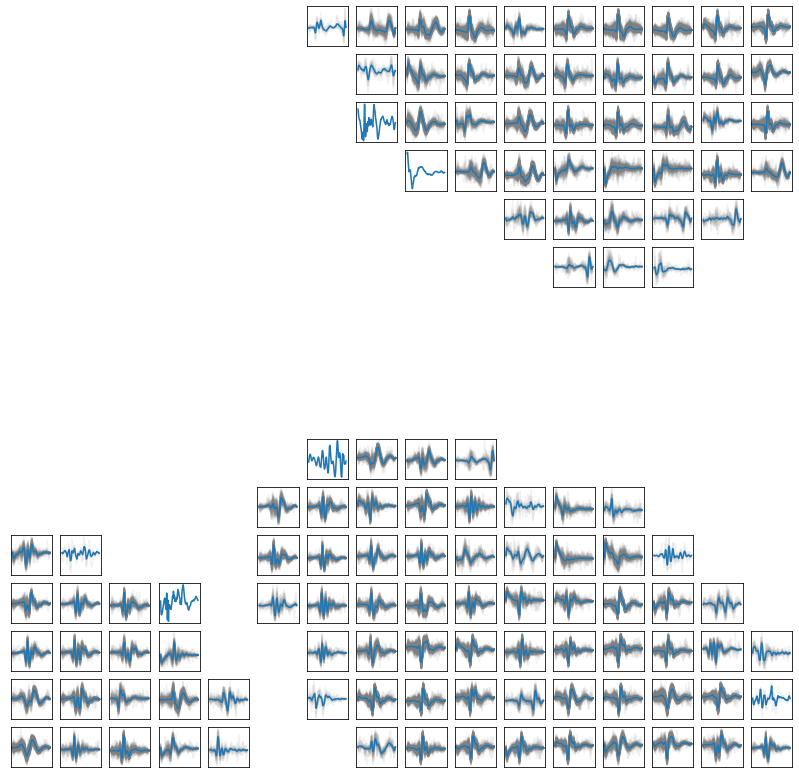

In [25]:
ana.plot_waveforms(features, som, size )

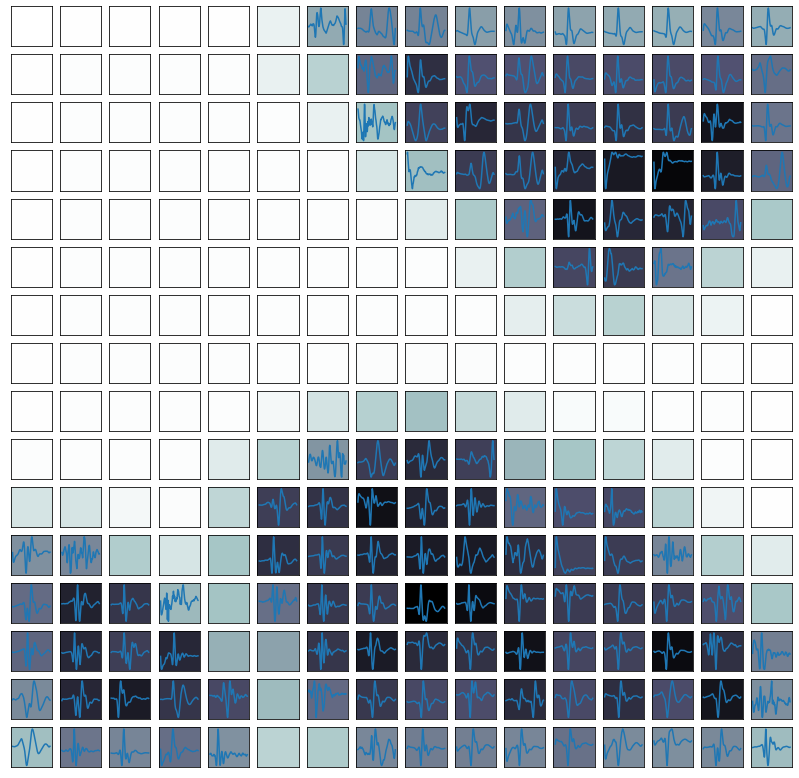

In [26]:
ana.plot_dmap(features, som, size)

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


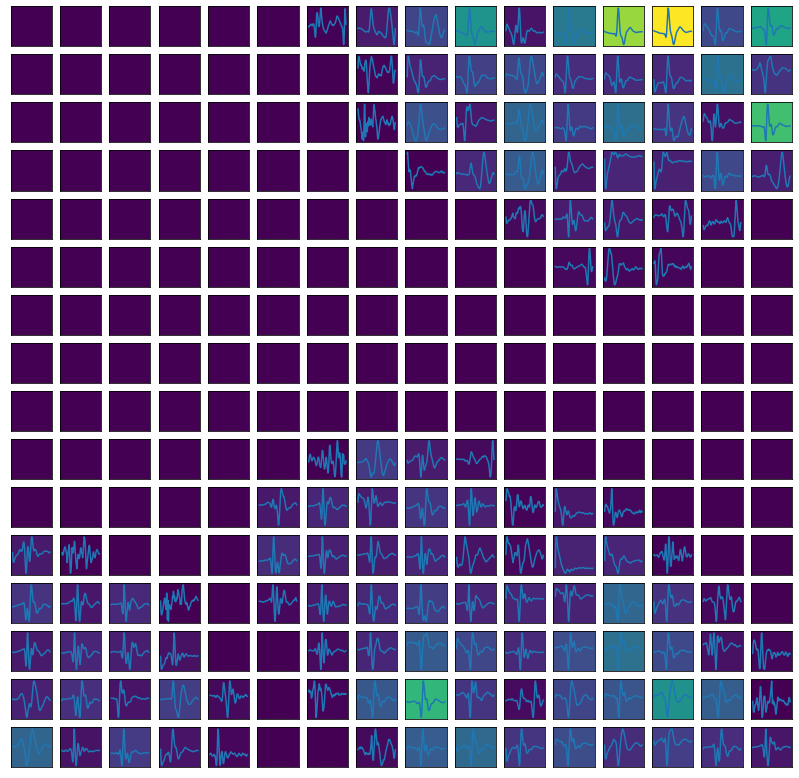

In [28]:
ana.plot_density(features, som, size )

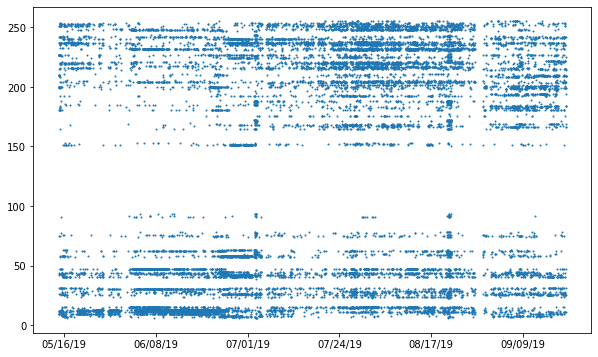

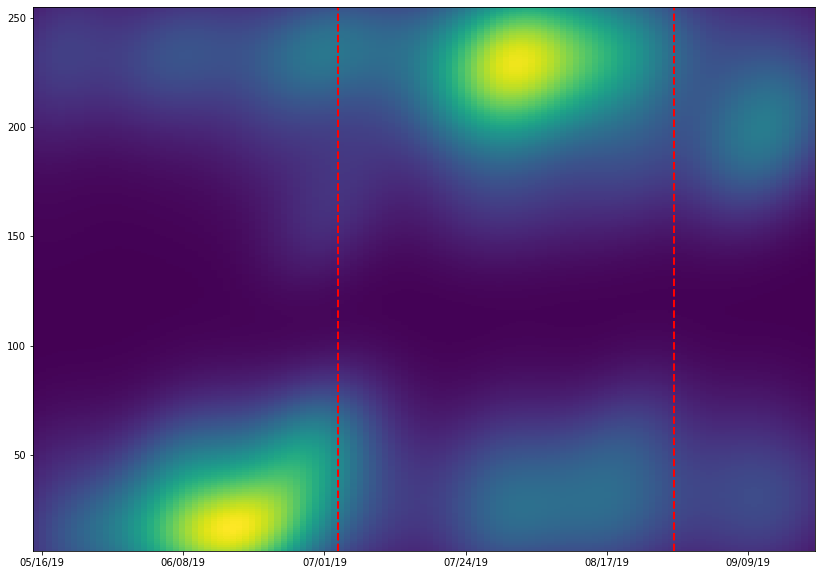

In [35]:
ana.plot_evo(df, som, size)